# 1. Подготовительный этап

**Импортируем датасет в pandas.dataFrame**

In [183]:
import pandas as pd
df = pd.read_csv("data.csv", index_col=0)
df

,password,strength
0,6q5qrdopq,1
1,sweety4,0
2,ipeni773,1
3,ball2529,1
4,ogegum317,1
...,...,...
23805,kv25on94,1
23806,torbay12,1
23807,kimthoa12345,1
23808,EEEEEEEEE,0


**Очистка датасета от возможных отсутствующих значений**\
**(если найдутся строки, где хотя бы одно значение NaN, они будут удалены)**

In [86]:
print(len(df))
print(len(df[df['password'].isnull()]))
print(len(df[df['strength'].isnull()]))

23810
0
0


**Атрибут password - строковое представление пароля.**\
**Основная его характеристика - количество символов.**

**Атрибут strength - стойкость пароля ко взлому:**\
**0 - слабый (относительно легко взломать)**\
**1 - средний (стойкость средняя)**\
**2 - сильный (взломать сложно)**

**Добавим в датасет следующие признаки:**

**length - длина пароля (количество символов)**\
**digit - признак, отвечающий за содержание цифр в пароле (0 - нет, 1 - да)**\
**lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**\
**other symbols - содержит ли пароль особые символы (0 - нет, 1 - да)**\
**distinct symbols - сколько различных символов содержит пароль**

In [87]:
df['length'] = df["password"].str.len()

In [88]:
def is_digit_in_password(password1):
    password = str(password1)
    for x in password:
        if x in "0123456789":
            return 1
    return 0
df["digit"] = df.apply(lambda x: is_digit_in_password(x["password"]), axis=1)

In [89]:
def lower_upper(password1):
    password = str(password1)
    if not(password.lower() == password or password.upper() == password):
        return 1
    return 0
df["lower & upper"] = df.apply(lambda x: lower_upper(x["password"]), axis=1)

In [90]:
def other_symbols(password1):
    password = str(password1)
    for x in password:
        if x not in "0123456789" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ".lower():
            return 1
    return 0
df["other_symbols"] = df.apply(lambda x: other_symbols(x["password"]), axis=1)

In [91]:
def distinct_symbols(password1):
    password = str(password1)
    c = 0
    p = ""
    for x in password:
        if x not in p:
            c += 1
            p += x
    return c
df["distinct_symbols"] = df.apply(lambda x: distinct_symbols(x["password"]), axis=1)

# 2. Анализ данных

**Для наглядности выведем на экран 20 случайных записей нашего dataframe**

In [92]:
df.sample(n=20)

,password,strength,length,digit,lower & upper,other_symbols,distinct_symbols
5982,luthien123,1,10,1,0,0,10
23211,mrh121594,1,9,1,0,0,8
14320,zzzzzzzzzzzzzzzz,0,16,0,0,0,1
10897,sebo82,0,6,1,0,0,6
13720,8sbSns7yktLqkHKW0scvBYq1taD1,2,28,1,1,0,22
11580,algoritmo7,1,10,1,0,0,9
7243,wing03,0,6,1,0,0,6
21291,ХХХХХХХ,0,7,0,0,1,1
7044,yrakon617,1,9,1,0,0,9
9586,GGGGGGGG,0,8,0,0,0,1


**Признак strength - стойкость пароля ко взлому по шкале от 0 до 2.**

**Изобразим на круговой диаграмме частотность каждой из оценки частотности паролей:**

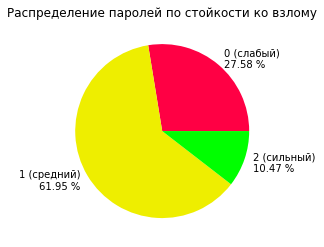

In [93]:
import matplotlib.pyplot as plt

d0 = len(df[df["strength"] == 0]) / len(df) * 100
d1 = len(df[df["strength"] == 1]) / len(df) * 100
d2 = len(df[df["strength"] == 2]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1, d2]
labels = ['''0 (слабый)
{} %'''.format(round(d0, 2)), 
          '''1 (средний)
{} %'''.format(round(d1, 2)), 
          '''2 (сильный)
{} %'''.format(round(d2, 2))]
colors = ["#F04", "#EE0", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по стойкости ко взлому")
plt.show()

**Признак digit отвечает за содержание цифр в пароле (0 - нет, 1 - да).**

**Изобразим на круговой диаграмме частотность паролей с цифрами и без соответственно:**

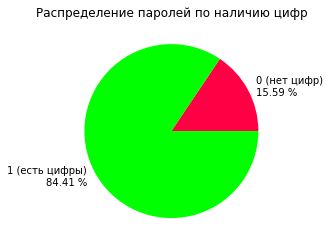

In [94]:
d0 = len(df[df["digit"] == 0]) / len(df) * 100
d1 = len(df[df["digit"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет цифр)
{} %'''.format(round(d0, 2)), 
          '''1 (есть цифры)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию цифр")
plt.show()

**Признак lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**

**Изобразим на круговой диаграмме частотность паролей с буквами разных регистров и без них:**

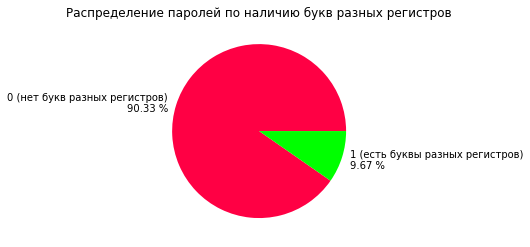

In [95]:
d0 = len(df[df["lower & upper"] == 0]) / len(df) * 100
d1 = len(df[df["lower & upper"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет букв разных регистров)
{} %'''.format(round(d0, 2)), 
          '''1 (есть буквы разных регистров)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию букв разных регистров")
plt.show()

**Признак other symbols - содержит ли пароль особые символы (0 - нет, 1 - да).**

**Изобразим на круговой диаграмме доли паролей с особыми символами и без них соответственно**

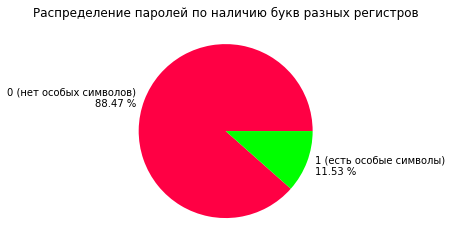

In [96]:
d0 = len(df[df["other_symbols"] == 0]) / len(df) * 100
d1 = len(df[df["other_symbols"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет особых символов)
{} %'''.format(round(d0, 2)), 
          '''1 (есть особые символы)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию букв разных регистров")
plt.show()

**Признак length - длина пароля (количество символов).**\
**Признак distinct_symbols - количество уникальных символов пароля.**

In [97]:
print(df["length"].min(), df["length"].max())

3 64


In [98]:
print(df["distinct_symbols"].min(), df["distinct_symbols"].max())

1 43


**Минимальная длина паролей из выборки - 1, а максимальная - 200.**\
**Минимальное количество уникальных символов паролей из выборки - 1, амаксимальная - 60.**\

**Отобразим частотность использования длин паролей на диаграмме рассеяния**

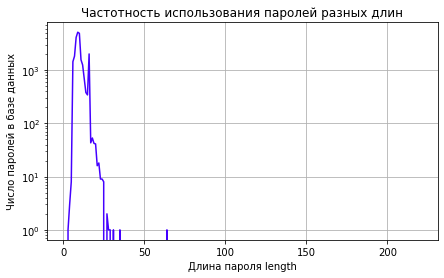

In [99]:
import matplotlib.pyplot as plt

length_count = list(map(lambda x: len(df[df["length"] == x]), [x for x in range(1, 221)]))
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Частотность использования паролей разных длин")
plt.xlabel("Длина пароля length")
plt.ylabel("Число паролей в базе данных")
ax.semilogy([x for x in range(1, 221)], length_count, color="#40F")
ax.grid()

**По графику видно, что наиболее популярны пароли длиной около 10 символов, а пароли длиной более 60-70 символов являются аномалиями и встречаются в единичных случаях. Тем не менее, эти аномалии недостаточно велики, чтобы повлиять на статистические показатели (среднее арифметическое, медиана, мода и другие) показатели огромной выборки.
Поэтому выбрасывать их из датасета не имеет смысла.**

In [100]:
print(length_count.index(max(length_count)) + 1)

9


**Самое популярное значение длины пароля: 9.**

**Для большей наглядности построим ещё столбчатую диаграмму и график:**

In [101]:
def probability(length):
    c = sum(length_count[1:length + 1]) / len(df)
    return c
probability_list = list(map(lambda x: probability(x), [x for x in range(1, 221)]))

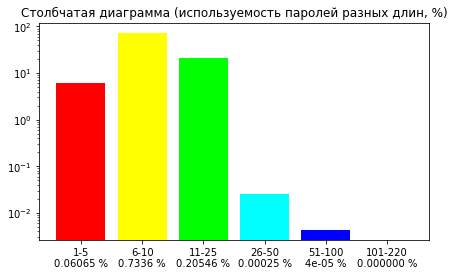

In [102]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Столбчатая диаграмма (используемость паролей разных длин, %)")
v1 = probability(5) - probability(0)
v2 = probability(10) - probability(5)
v3 = probability(25) - probability(10)
v4 = probability(50) - probability(25)
v5 = probability(100) - probability(50)
v6 = probability(220) - probability(100)
values = [100 * x for x in [v1, v2, v3, v4, v5, v6]]
labels = ["1-5\n{} %".format(round(v1, 5)), 
          "6-10\n{} %".format(round(v2, 5)), 
          "11-25\n{} %".format(round(v3, 5)), 
          "26-50\n{} %".format(round(v4, 5)), 
          "51-100\n{} %".format(round(v5, 5)), 
          "101-220\n{} %".format(format(v6, "f"))] 
ax.set_yscale('log')
colors = ["#F00", "#FF0", "#0F0", "#0FF", "#00F", "#F0F"]
plt.bar(labels, values, color=colors)
plt.show()

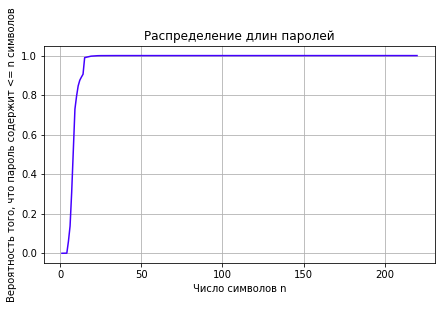

In [103]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Распределение длин паролей")
plt.xlabel("Число символов n")
plt.ylabel("Вероятность того, что пароль содержит <= n символов")
ax.plot([x for x in range(1, 221)], probability_list, color="#40F")
ax.grid()

**Из этих двух графиков мы можем увидеть, что основную массу (>99%) составляют пароли длиной до 25 символов включительно.**

# 3. Построение простых моделей

## Модель I (логистическая регрессия)

**В этой модели мы будем использовать логистическую регрессию - один из методов классификации. Рассмотрим несколько случаев с разным набором факторов.**

**Случай 1**\
**В качестве факторов мы выберем все 4 атрибута пароля: длина, наличие цифр, букв разного регистра, специальных символов и количество уникальных символов**

**Выделим целевую переменную и факторы**

In [104]:
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1).drop("password", axis=1)
Y = df.strength

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [107]:
%%time
logistic = LogisticRegression(class_weight='balanced')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Wall time: 3.23 s


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [108]:
Y_pred = clf.predict(X_test)

**Вычислим матрицу ошибок для этой модели**

In [109]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, Y_pred))

[[1150  137    3]
 [  85 2866   20]
 [   0    0  501]]


# 4. Сравнение и анализ моделей

**Случай 2**\
**В качестве фактора возьмём один - длина пароля в символах.**

**Выделим целевую переменную и факторы**

In [110]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [111]:
%%time
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
#parameters = {'C': np.logspace(-4, 4, 50)}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Wall time: 2.36 s


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [112]:
Y_pred = clf.predict(X_test)

In [113]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[ 304  924   77]
 [   0 2977    0]
 [   0    0  480]]


**Случай 3**\
**Попробуем в качестве фактора использовать наличие цифр**

In [114]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [115]:
%%time
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

Wall time: 1.34 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [116]:
Y_pred = clf.predict(X_test)

In [117]:
print(metrics.confusion_matrix(Y_test, Y_pred))
#print(metrics.accuracy_score(Y_test, Y_pred))
#print(metrics.precision_score(Y_test, Y_pred, average=None))
#print(metrics.f1_score(Y_test, Y_pred, average=None))

[[ 708  588    0]
 [  21 2962    0]
 [   2  481    0]]


**Случай 4**\
**Попробуем в качестве фактора использовать наличие букв разных регистров**

In [118]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [119]:
%%time
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

Wall time: 519 ms


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [120]:
Y_pred = clf.predict(X_test)

In [121]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[   0 1294    0]
 [   0 2945    1]
 [   0   45  477]]


**Случай 5**\
**Попробуем в качестве фактора использовать наличие специальных символов**

In [122]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [123]:
%%time
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Wall time: 1.28 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [124]:
Y_pred = clf.predict(X_test)

In [125]:
print(metrics.confusion_matrix(Y_test, Y_pred))
#print(metrics.accuracy_score(Y_test, Y_pred))
#print(metrics.precision_score(Y_test, Y_pred, average=None))
#print(metrics.f1_score(Y_test, Y_pred, average=None))

[[ 439  842    0]
 [  25 2971    0]
 [  57  428    0]]


**Случай 6**\
**Попробуем в качестве фактора использовать количество уникальных символов пароля**

In [126]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [127]:
%%time
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Wall time: 2.44 s


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [128]:
Y_pred = clf.predict(X_test)

In [129]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[1144  116    0]
 [ 386 2557   71]
 [   0   30  458]]


**Матрицы ошибок:**

In [130]:
print('Случай 1')
print('''[[17806    45     1]
 [  102 98941   349]
 [    0     0 16732]]''')
print('Случай 2')
print('''[[17861    20     0]
 [    0 99066     5]
 [    0     0 17024]]''')
print('Случай 3')
print('''[[ 708  588    0]
 [  21 2962    0]
 [   2  481    0]]''')
print('Случай 4')
print('''[[   0 1294    0]
 [   0 2945    1]
 [   0   45  477]]''')
print('Случай 5')
print('''[[    0 17840   319]
 [    0 97819  1245]
 [    0 14404  2349]]''')
print('Случай 6')
print('''[[ 5991 11989     0]
 [ 3593 93980  1873]
 [    2  1488 15060]]''')

Случай 1
[[17806    45     1]
 [  102 98941   349]
 [    0     0 16732]]
Случай 2
[[17861    20     0]
 [    0 99066     5]
 [    0     0 17024]]
Случай 3
[[    0 17936     0]
 [    0 99362     0]
 [    0 16678     0]]
Случай 4
[[    0 17916    40]
 [    0 99467    39]
 [    0  1348 15166]]
Случай 5
[[    0 17840   319]
 [    0 97819  1245]
 [    0 14404  2349]]
Случай 6
[[ 5991 11989     0]
 [ 3593 93980  1873]
 [    2  1488 15060]]


**В случаях 2-5 собой однофакторную классификацию с факторами length, lower & upper, digit, other_symbols и distinct_symbols соответственно.**

**Выяснилось, что в случае 2 классификация работает на наборе данных достаточно хорошо, а вот матрицы ошибок для случаев 3-5 показали не самые лучшие результаты - так, в них нет ни одного пароля, верного отнесённого к классу 0.**\
**Случай 6 имеет меньше "ошибок", но всё же его нельзя использовать для построения готовой модели - из всех паролей, фактически имеющих класс "0", моделью верно определена лишь треть.**\
**Попробуем рассмотреть комбинацию случаев 2 и 6, то есть с факторами длины и количества уникальных символов.**

**Случай 7**\
**Попробуем в качестве факторов использовать длину пароля и количество уникальных символов**

In [131]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [132]:
%%time
logistic = LogisticRegression(class_weight='balanced')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train, Y_train)

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Wall time: 2.66 s


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [133]:
Y_pred = clf.predict(X_test)

In [134]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[1098  142    4]
 [ 109 2928    4]
 [   0    0  477]]


**Теперь изобразим матрицы ошибок для каждого случая, время обучения модели и найдём оптимальный из этих случаев**

In [135]:
print('Случай 1, время обучения 3min 47s')
print('''[[1150  137    3]
 [  85 2866   20]
 [   0    0  501]]''')
print('Случай 2, время обучения 2min 53s')
print('''[[ 304  924   77]
 [   0 2977    0]
 [   0    0  480]]''')
print('Случай 3, время обучения 1min 34s')
print('''[[ 304  924   77]
 [   0 2977    0]
 [   0    0  480]]''')
print('Случай 4, время обучения 43.1 s')
print('''[[    0 17916    40]
 [    0 99467    39]
 [    0  1348 15166]]''')
print('Случай 5, время обучения 1min 14s')
print('''[[ 439  842    0]
 [  25 2971    0]
 [  57  428    0]]''')
print('Случай 6, время обучения 1min 14s')
print('''[[1144  116    0]
 [ 386 2557   71]
 [   0   30  458]]''')
print('Случай 7, время обучения 3min 20s')
print('''[[1098  142    4]
 [ 109 2928    4]
 [   0    0  477]]''')

Случай 1, время обучения 3min 47s
[[17806    45     1]
 [  102 98941   349]
 [    0     0 16732]]
Случай 2, время обучения 2min 53s
[[17861    20     0]
 [    0 99066     5]
 [    0     0 17024]]
Случай 3, время обучения 1min 34s
[[    0 17936     0]
 [    0 99362     0]
 [    0 16678     0]]
Случай 4, время обучения 43.1 s
[[    0 17916    40]
 [    0 99467    39]
 [    0  1348 15166]]
Случай 5, время обучения 1min 14s
[[    0 17840   319]
 [    0 97819  1245]
 [    0 14404  2349]]
Случай 6, время обучения 1min 14s
[[ 5991 11989     0]
 [ 3593 93980  1873]
 [    2  1488 15060]]
Случай 7, время обучения 3min 20s
[[17976    12     0]
 [    0 99376     9]
 [    0     0 16603]]


# 5. Выводы

**Лучшие результаты матрицы ошибок показали в случаях 2 и 7, их время обучения отличается незначительно.**\
**Для последующих моделей я возьму случай 7.**

# 6. Построение моделей с учётом выводов

## Модель II (метод ближайших соседей)

In [136]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [137]:
%%time
regressor_n = KNeighborsRegressor()
parameters = [{'n_neighbors': [2, 5, 10], 'weights': ['uniform','distance']}]
clf2 = GridSearchCV(regressor_n, parameters)
clf2.fit(X_train, Y_train)

Wall time: 1.59 s


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 5, 10],
                          'weights': ['uniform', 'distance']}])

In [138]:
Y_pred = clf2.predict(X_test)

In [139]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))

[[1250    0    0]
 [   0 2971    0]
 [   0    0  541]]


## Модель III (метод опорных векторов)

In [174]:
from sklearn.svm import SVC

In [175]:
%%time
svc = SVC()
parameters = {'C':[1,10,100,1000]}
clf3 = GridSearchCV(svc, parameters)
clf3.fit(X_train, Y_train)

Wall time: 1.99 s


GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10, 100, 1000]})

In [176]:
Y_pred = clf3.predict(X_test)

In [177]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))

[[1250    0    0]
 [   0 2971    0]
 [   0    0  541]]


## Модель IV (классификатор дерева решений)

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
%%time
regressor = DecisionTreeRegressor()
parameters = {"splitter": ["best", "random"]}
clf4 = GridSearchCV(regressor, parameters)
clf4.fit(X_train, Y_train)

Wall time: 58 ms


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'splitter': ['best', 'random']})

In [146]:
Y_pred = clf4.predict(X_test)

In [147]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))

[[1250    0    0]
 [   0 2971    0]
 [   0    0  541]]


## Модель V (метод Случайный лес (Random Forests))

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
%%time
rfc = RandomForestClassifier()
parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf5 = GridSearchCV(rfc, parameters)
clf5.fit(X_train, Y_train)

Wall time: 29.5 s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [150]:
Y_pred = clf5.predict(X_test)

In [151]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))

[[1250    0    0]
 [   0 2971    0]
 [   0    0  541]]


## Модель VI (наивный байесовский метод (Naive Bayes))

In [152]:
from sklearn.naive_bayes import MultinomialNB

In [153]:
%%time
multi = MultinomialNB(class_prior=[0.3, 0.6, 0.1])
parameters = { 
    'fit_prior': [True, False]}
clf6 = GridSearchCV(multi, parameters)
clf6.fit(X_train, Y_train)

Wall time: 62 ms


GridSearchCV(estimator=MultinomialNB(class_prior=[0.3, 0.6, 0.1]),
             param_grid={'fit_prior': [True, False]})

In [154]:
Y_pred = clf6.predict(X_test)

In [155]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))

[[ 756  494    0]
 [  12 2959    0]
 [   0  541    0]]


## Модель VII (нелинейная классификация)

In [156]:
%%time
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
parameters = {'C':[1,10,100,1000]}
clf7 = GridSearchCV(svm_rbf, parameters)
clf7.fit(X_train, Y_train)

Wall time: 2.55 s


GridSearchCV(estimator=SVC(C=10.0, gamma=0.1, random_state=1),
             param_grid={'C': [1, 10, 100, 1000]})

In [157]:
Y_pred = clf7.predict(X_test)

In [158]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))

[[1250    0    0]
 [   2 2969    0]
 [   0    0  541]]


**Найдём cross_val_score для каждой из моделей**

**Модель I**

In [159]:
from sklearn.model_selection import cross_val_score
clf_scores1 = cross_val_score(clf, X, Y, cv=2)
print(clf_scores1.mean())

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

0.9317933641327174


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


**Модель II**

In [160]:
clf_scores2 = cross_val_score(clf2, X, Y, cv=2)
print(clf_scores2.mean())

0.999619605448375


**Модель III**

In [180]:
clf_scores3 = cross_val_score(clf3, X, Y, cv=2)
print(clf_scores3.mean())

1.0


**Модель IV**

In [162]:
clf_scores4 = cross_val_score(clf4, X, Y, cv=2)
print(clf_scores4.mean())

0.9998781917496167


**Модель V**

In [163]:
clf_scores5 = cross_val_score(clf5, X, Y, cv=2)
print(clf_scores5.mean())

1.0


**Модель VI**

In [164]:
clf_scores6 = cross_val_score(clf6, X, Y, cv=2)
print(clf_scores6.mean())

0.7778244435111298


**Модель VII**

In [165]:
clf_scores7 = cross_val_score(clf7, X, Y, cv=2)
print(clf_scores7.mean())

0.9998740025199496


**Изобразим для каждой модели время обучения и cross_val_score на графике**

In [185]:
time = [2.66, 1.59, 1.99, 0.058, 29.5, 0.062, 2.55]

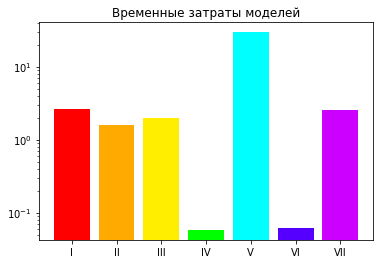

In [186]:
groups = ["I", "II", "III", "IV", "V", "VI", "VII"]
colors = ["#F00", "#FA0", "#FE0", "#0F0", "#0FF", "#50F", "#C0F"]
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.bar(groups, time, color=colors)
plt.title("Временные затраты моделей")
plt.show()

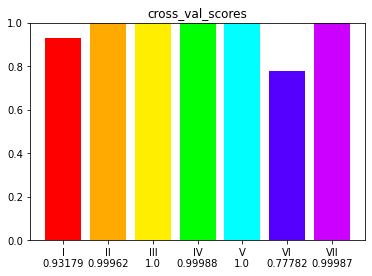

In [184]:
cross_val_scores = [clf_scores1.mean(),
                    clf_scores2.mean(),
                    clf_scores3.mean(),
                    clf_scores4.mean(),
                    clf_scores5.mean(),
                    clf_scores6.mean(),
                    clf_scores7.mean()]
groups = ["I\n{}".format(round(clf_scores1.mean(), 5)), 
          "II\n{}".format(round(clf_scores2.mean(), 5)),
          "III\n{}".format(round(clf_scores3.mean(), 5)),
          "IV\n{}".format(round(clf_scores4.mean(), 5)),
          "V\n{}".format(round(clf_scores5.mean(), 5)),
          "VI\n{}".format(round(clf_scores6.mean(), 5)),
          "VII\n{}".format(round(clf_scores7.mean(), 5))]

fig, ax = plt.subplots()
plt.ylim(ymax = 1, ymin = 0)
plt.bar(groups, cross_val_scores, color=colors)
plt.title("cross_val_scores")
plt.show()

# 7. Итоговый результат

**Модель IV (классификатор дерева решения) имеет время обучения 58 мс и значение cross_val_score равное 0,99988, по матрице ошибок неверно определённых значений нет.\
Модель V отличается тем, что ёе значение cross_val_score равно 1, но по времени обучения она значительно проигрывает (29,5 секунд).\
Высокую эффективность показали и модели II, III и VII, но время обучения их значительно выше, чем у модели IV. \
Модели I и VI имеют cross_val_score 0.93179 и 0.77782 соответственно, что значительно ниже, чем у остальных моделей.\
Таким образом, наиболее эффективной оказалась модель IV.**